In [1]:
#Import libraries 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Define Sigmoid function

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [9]:
#Generate random toy data

np.random.seed(42)

x_class0 = np.random.randn(50, 2) - 2  # Cluster around (-2, -2)
x_class1 = np.random.randn(50, 2) + 2  # Cluster around (+2, +2)

X = np.vstack((x_class0, x_class1)) # shape (100, 2) # shape (100, 2)
y = np.array([0]*50 + [1]*50).reshape(-1, 1) # shape (100, 1)

In [10]:
#Initialize parameters 

w = np.random.randn(2,1) * 0.01
b = 0.0
learning_rate = 0.1

In [11]:
#Training loop

for epoch in range(1000):
    z = np.dot(X, w)
    y_pred = sigmoid(z)

    #Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 + y)*np.log(1 - y_pred + 1e-9))

    #Gradients 
    dz = y_pred - y
    dw = np.dot(X.T, dz)/ X.shape[0]
    db = np.mean(dz)

    #Update
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

Epoch 0 | Loss: 1.3863
Epoch 100 | Loss: 4.6010
Epoch 200 | Loss: 5.4876
Epoch 300 | Loss: 6.0432
Epoch 400 | Loss: 6.4540
Epoch 500 | Loss: 6.7821
Epoch 600 | Loss: 7.0563
Epoch 700 | Loss: 7.2924
Epoch 800 | Loss: 7.5002
Epoch 900 | Loss: 7.6859


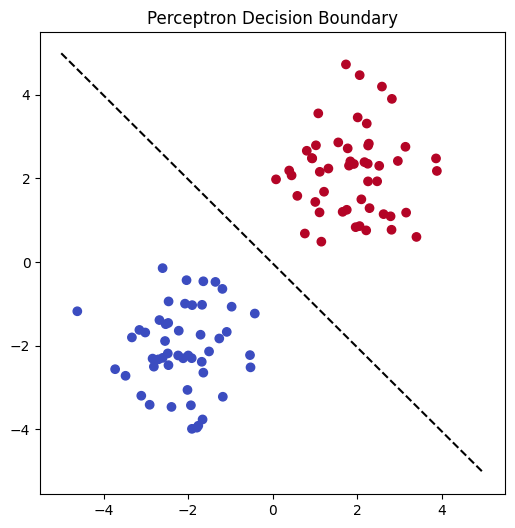

In [13]:
#Visualize decision boundary

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm')

x_vals = np.linspace(-5, 5, 100)
y_vals = -(w[0]*x_vals + b)/ w[1]

plt.plot(x_vals, y_vals.ravel(), 'k--')
plt.title("Perceptron Decision Boundary")
plt.show()